In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Student_Performance.csv")
print(df.shape)
df.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# Визуализация

In [7]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

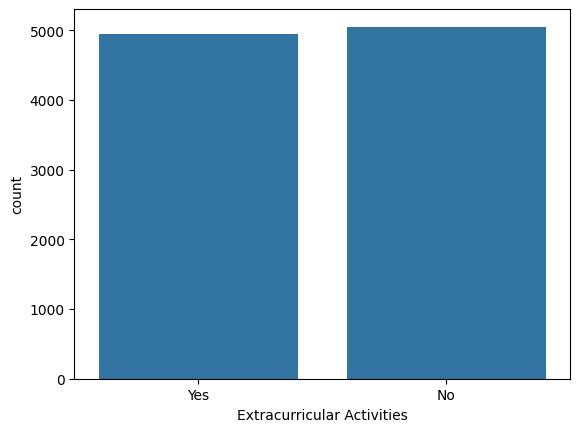

In [8]:
sns.countplot(data=df, x='Extracurricular Activities')

In [9]:
df['Extracurricular Activities']=df['Extracurricular Activities'].replace({"No":0, "Yes":1})

<Axes: xlabel='Hours Studied', ylabel='count'>

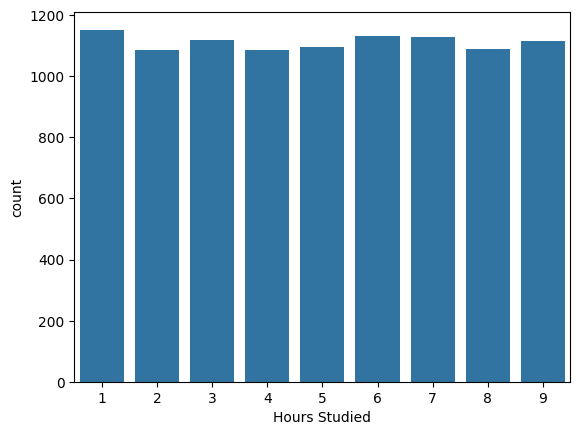

In [10]:
sns.countplot(data=df, x='Hours Studied')

In [11]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

Количество студентов, обучающихся 9 часов, не превышает числа студентов, обучающихся 1 час. Распределение равномерное.

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

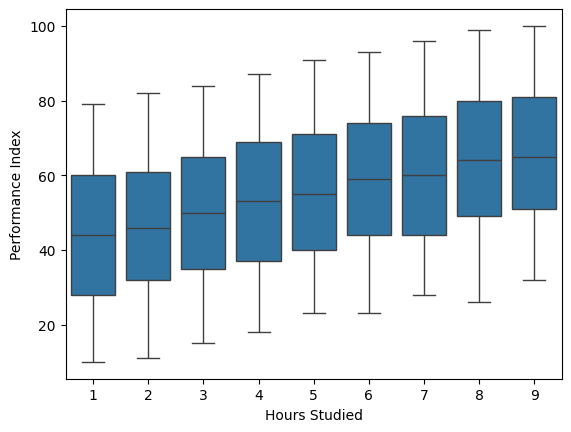

In [12]:
sns.boxplot(data=df, x='Hours Studied', y='Performance Index')

Успеваемость лучше, если студент учится больше часов

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

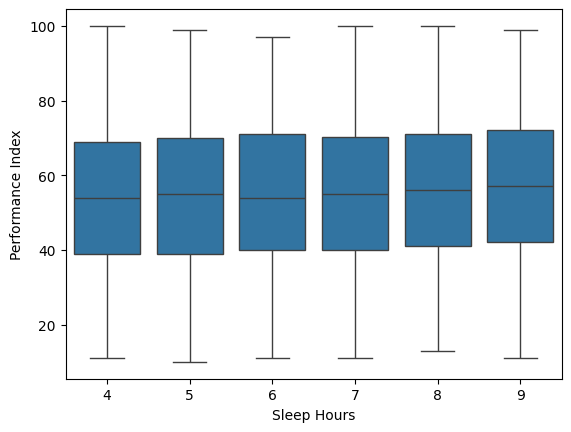

In [13]:
sns.boxplot(data=df, x='Sleep Hours', y='Performance Index')

Увелечение количества сна не приводит к улучшению производительности, все сбалансированно

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

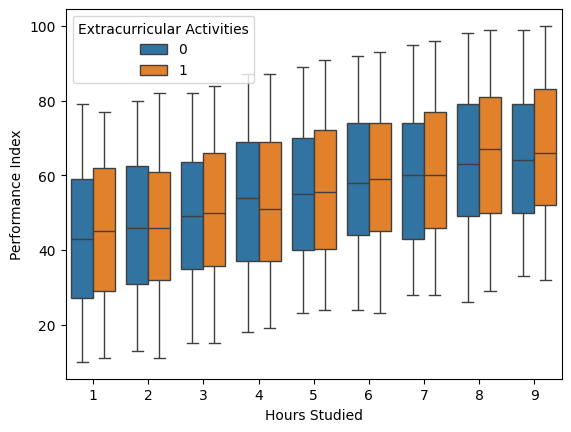

In [14]:
sns.boxplot(data=df, x='Hours Studied', y='Performance Index', hue='Extracurricular Activities')

При большом количестве учебных часов успеваемость выше, внеклассовая деятельность существнно не влиется

In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Линейная регрессия


In [16]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#var_to_stand=["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Performance Index", axis=1),
    df["Performance Index"],
    test_size=0.25,
    random_state=0
)
#sc = StandardScaler()
#X_train[var_to_stand] = sc.fit_transform(X_train[var_to_stand])
#X_test[var_to_stand] = sc.transform(X_test[var_to_stand])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
pred_lr = lr.predict(X_test)

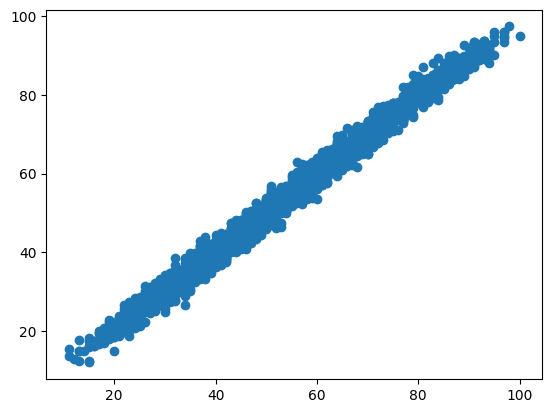

In [21]:
plt.scatter(y_test, pred_lr)

In [22]:
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
print(f"MSE {mse:.3} | R2 {r2:.3%}")

MSE 4.08 | R2 98.847%


In [23]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [24]:
x_input = [8, 51, 1, 7, 2]
predictions = lr.predict([x_input])[0]
print(predictions)

45.07614540333558


C:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.model_selection import GridSearchCV

def gridsearch(X_train, y_train, model, params, scoring="neg_mean_squared_error", cv=5):
  """Перебор всевозможных гиперпараметров.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param model: модель, для которой производится подбор гиперпараметров
  :param params: словарь с названиями гиперпараметрамов и всеми наборами значений
  :param scoring: функция, которая будет минимизироваться в ходе кросс-валидации
  :param cv: количество частей, на которые будет поделена выборка 

  :return: наилучшие гиперпараметры
  """ 
  searcher = GridSearchCV(
      model, 
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_

  print("Best hyperparameters:", best_params)
  return best_params

In [26]:
best_params_lr = gridsearch(
    X_train, y_train,
    LinearRegression(),    {
        "fit_intercept": [True, False], # default = True
        "positive": [True, False], # default = False
    }
)

Best hyperparameters: {'fit_intercept': True, 'positive': False}


In [27]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param X_test: объекты тестовой выборки
  :param y_test: значения целевой переменной тестовой выборки
  :param model: модель, которая обучается и тестируется
  """
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 3)))

  return pred, mse, r2

In [28]:
pred_lr, mse_lr, r2_lr = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    LinearRegression(**best_params_lr)
)

MSE = 4.083; R2 = 0.988


## Модель с $L_1-$ и $L_2-$регуляризацией

In [29]:
from sklearn.linear_model import Ridge, Lasso

In [30]:
best_params_ridge = gridsearch(
    X_train, y_train,
    Ridge(),
    {
        "alpha": np.logspace(-2, 3, 21), # default = 1.0
        "tol": np.logspace(-5, 0, 21), # default=1e-3
    }
)

pred_ridge, mse_ridge, r2_ridge = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    Ridge(**best_params_ridge)
)

Best hyperparameters: {'alpha': 5.623413251903491, 'tol': 1e-05}
MSE = 4.083; R2 = 0.988


In [31]:
best_params_lasso = gridsearch(
    X_train, y_train,
    Lasso(),
    {
        "alpha": np.logspace(-2, 3, 21), # default = 1.0
        "tol": np.logspace(-5, 0, 21), # default=1e-4
     
    }
)

pred_lasso, mse_lasso, r2_lasso = model_train_test(
    X_train,
    y_train, 
    X_test, 
    y_test, 
    Lasso(**best_params_lasso)
)

Best hyperparameters: {'alpha': 0.01, 'tol': 1e-05}
MSE = 4.08; R2 = 0.988


## Визуализация предсказаний 


In [32]:
# Отсортируем значения целевой переменной и предсказания

order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
pred_lr_ordered = pred_lr[order]
pred_ridge_ordered = pred_ridge[order]
pred_lasso_ordered = pred_lasso[order]

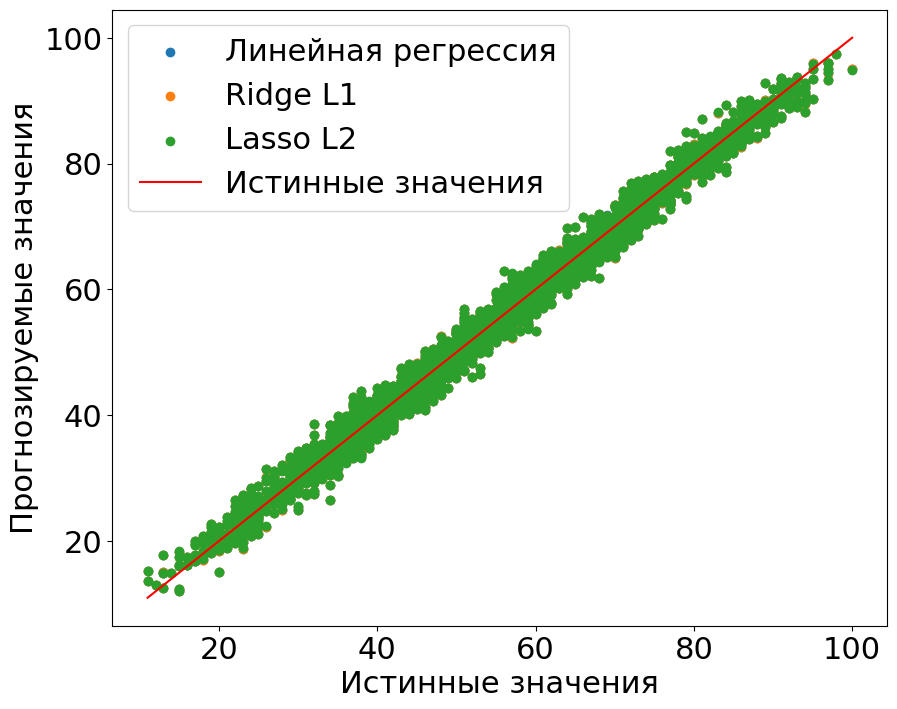

In [33]:
plt.rc('font', size=22) # далее во всех графиках будет использоваться такой же размер шрифта

plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_lr_ordered, label="Линейная регрессия")
plt.scatter(y_test_ordered, pred_ridge_ordered, label="Ridge L1")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Lasso L2")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Метод k-ближайших соседей

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
best_params_knn = gridsearch(
    X_train, y_train,
    KNeighborsRegressor(),
    {
        "n_neighbors": np.arange(1, 21), # default = 5
        "p": [1, 2], # default = 2
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], # default = "auto"
    }
)

pred_knn, mse_knn, r2_knn = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    KNeighborsRegressor(**best_params_knn)
)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 12, 'p': 2}
MSE = 5.594; R2 = 0.984


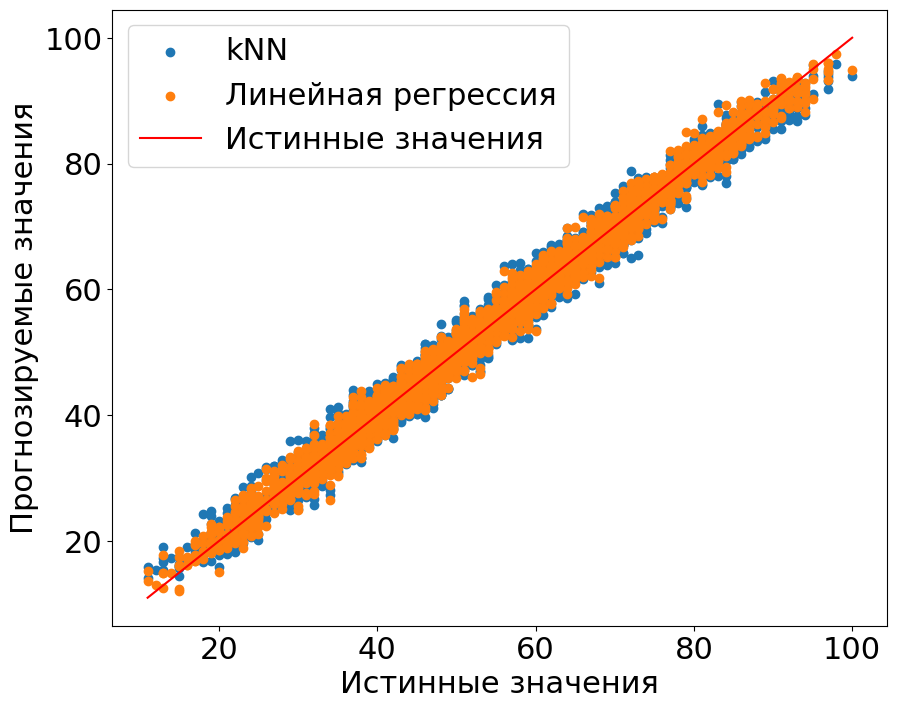

In [36]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_knn[order], label="kNN")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Линейная регрессия")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Решающие деревья

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
best_params_dt = gridsearch(
    X_train, y_train,
    DecisionTreeRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "min_samples_leaf": [i for i in range(1, 41)], # default = 1
        "max_features": [None, "auto", "sqrt", "log2"] # default = None
    }
)

pred_dt, mse_dt, r2_dt = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    DecisionTreeRegressor(**best_params_dt)
)

Best hyperparameters: {'max_depth': 50, 'max_features': None, 'min_samples_leaf': 7}
MSE = 5.964; R2 = 0.983


C:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

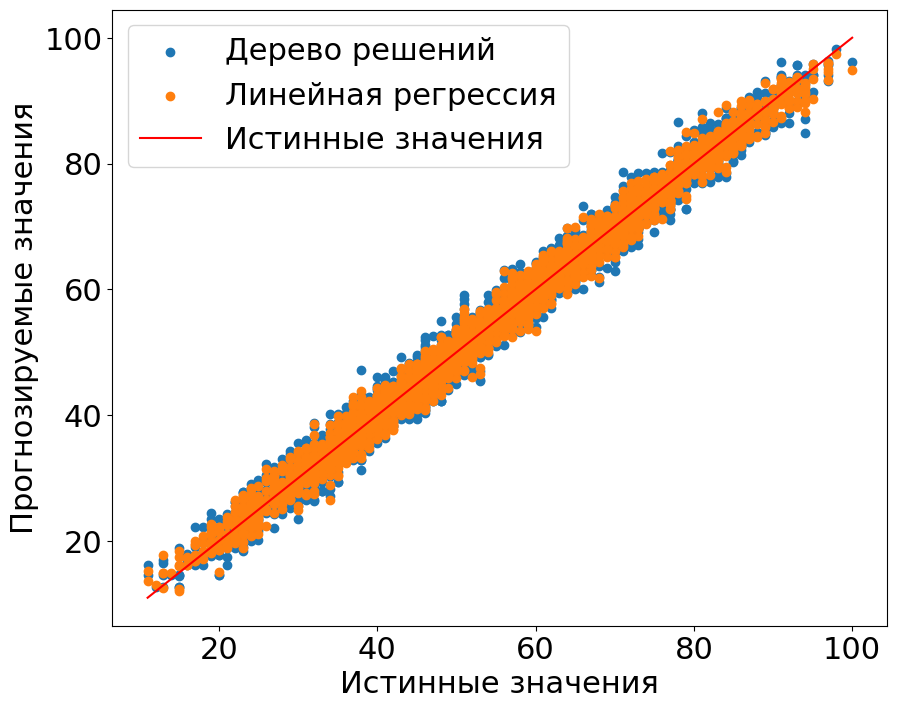

In [38]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_dt[order], label="Дерево решений")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Линейная регрессия")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Ансамбли моделей

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
best_params_rf = gridsearch(
    X_train, y_train,
    RandomForestRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "n_estimators": [i for i in range(50, 351, 50)], # default = 100
    }
)

pred_rf, mse_rf, r2_rf = model_train_test(
    X_train,
    y_train, 
    X_test, 
    y_test, 
    RandomForestRegressor(**best_params_rf)
)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 300}
MSE = 4.931; R2 = 0.986


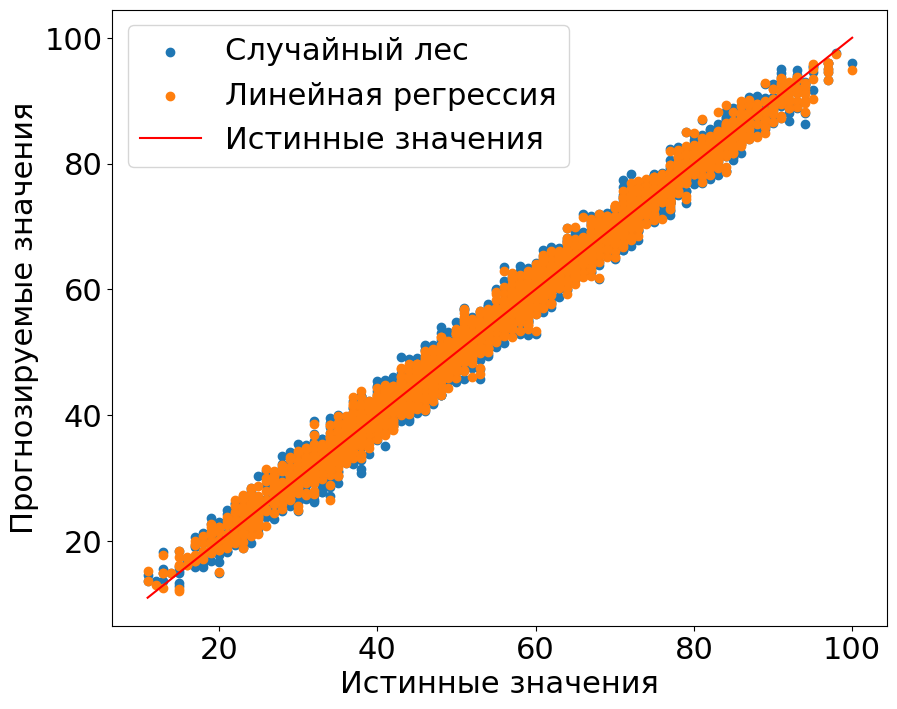

In [44]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_rf[order], label="Случайный лес")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Линейная регрессия")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

In [45]:
ans_df = pd.DataFrame()
ans_df["Model"] = ["Линейная регрессия", "Ridge L1", "Lasso L2", "kNN", "Дерево решений", "Случайный лес"]
ans_df["MSE"] = [mse_lr, mse_ridge, mse_lasso, mse_knn, mse_dt, mse_rf]
ans_df["R2"] = [r2_lr, r2_ridge, r2_lasso, r2_knn, r2_dt, r2_rf]

In [46]:
ans_df.sort_values(by=["MSE"], ascending=True).sort_values(by=["R2"], ascending=False)

,Model,MSE,R2
2,Lasso L2,4.080148,0.988476
1,Ridge L1,4.082553,0.988469
0,Линейная регрессия,4.082704,0.988468
5,Случайный лес,4.930593,0.986074
3,kNN,5.593686,0.984201
4,Дерево решений,5.963950,0.983155
